In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
path = '~/Desktop/CareerFoundry/3.1./'

In [3]:
pleasant = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
climate_scaled = pd.read_pickle(os.path.join(path, 'Data/Clean/weather_scaled.pkl'))
climate_scaled

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [5]:
climate = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


CLIMATE SCALED

In [6]:
pleasant = pleasant.drop(columns=["DATE"])
X = climate_scaled.drop(columns=["DATE", "MONTH", "id"])


In [7]:
stations = [col.split("_")[0] for col in pleasant.columns]  # station names
X = X[[col for col in X.columns if col.split("_")[0] in stations]]


In [8]:
y = pleasant.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
k_range = np.arange(1, 4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

for i, k in enumerate(k_range):
    print("Testing k =", k)

    knn = KNeighborsClassifier(n_neighbors=k)
    clf = MultiOutputClassifier(knn, n_jobs=-1)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    train_acc[i] = clf.score(X_train, y_train)
    test_acc[i]  = clf.score(X_test, y_test)


Testing k = 1
Testing k = 2
Testing k = 3


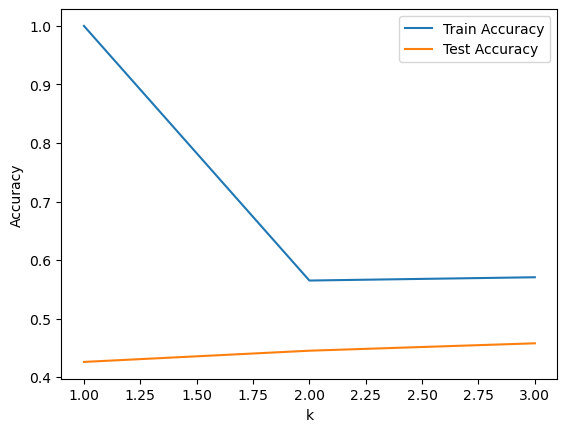

In [10]:
plt.plot(k_range, train_acc, label='Train Accuracy')
plt.plot(k_range, test_acc, label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
y_pred_test = climate_dt.predict(X_test)

print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

print('Test accuracy score: ',cross_val_score(climate_dt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6022537119955728
Test accuracy score:  0.5515894150060404


In [11]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
clf = MultiOutputClassifier(knn, n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


/opt/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


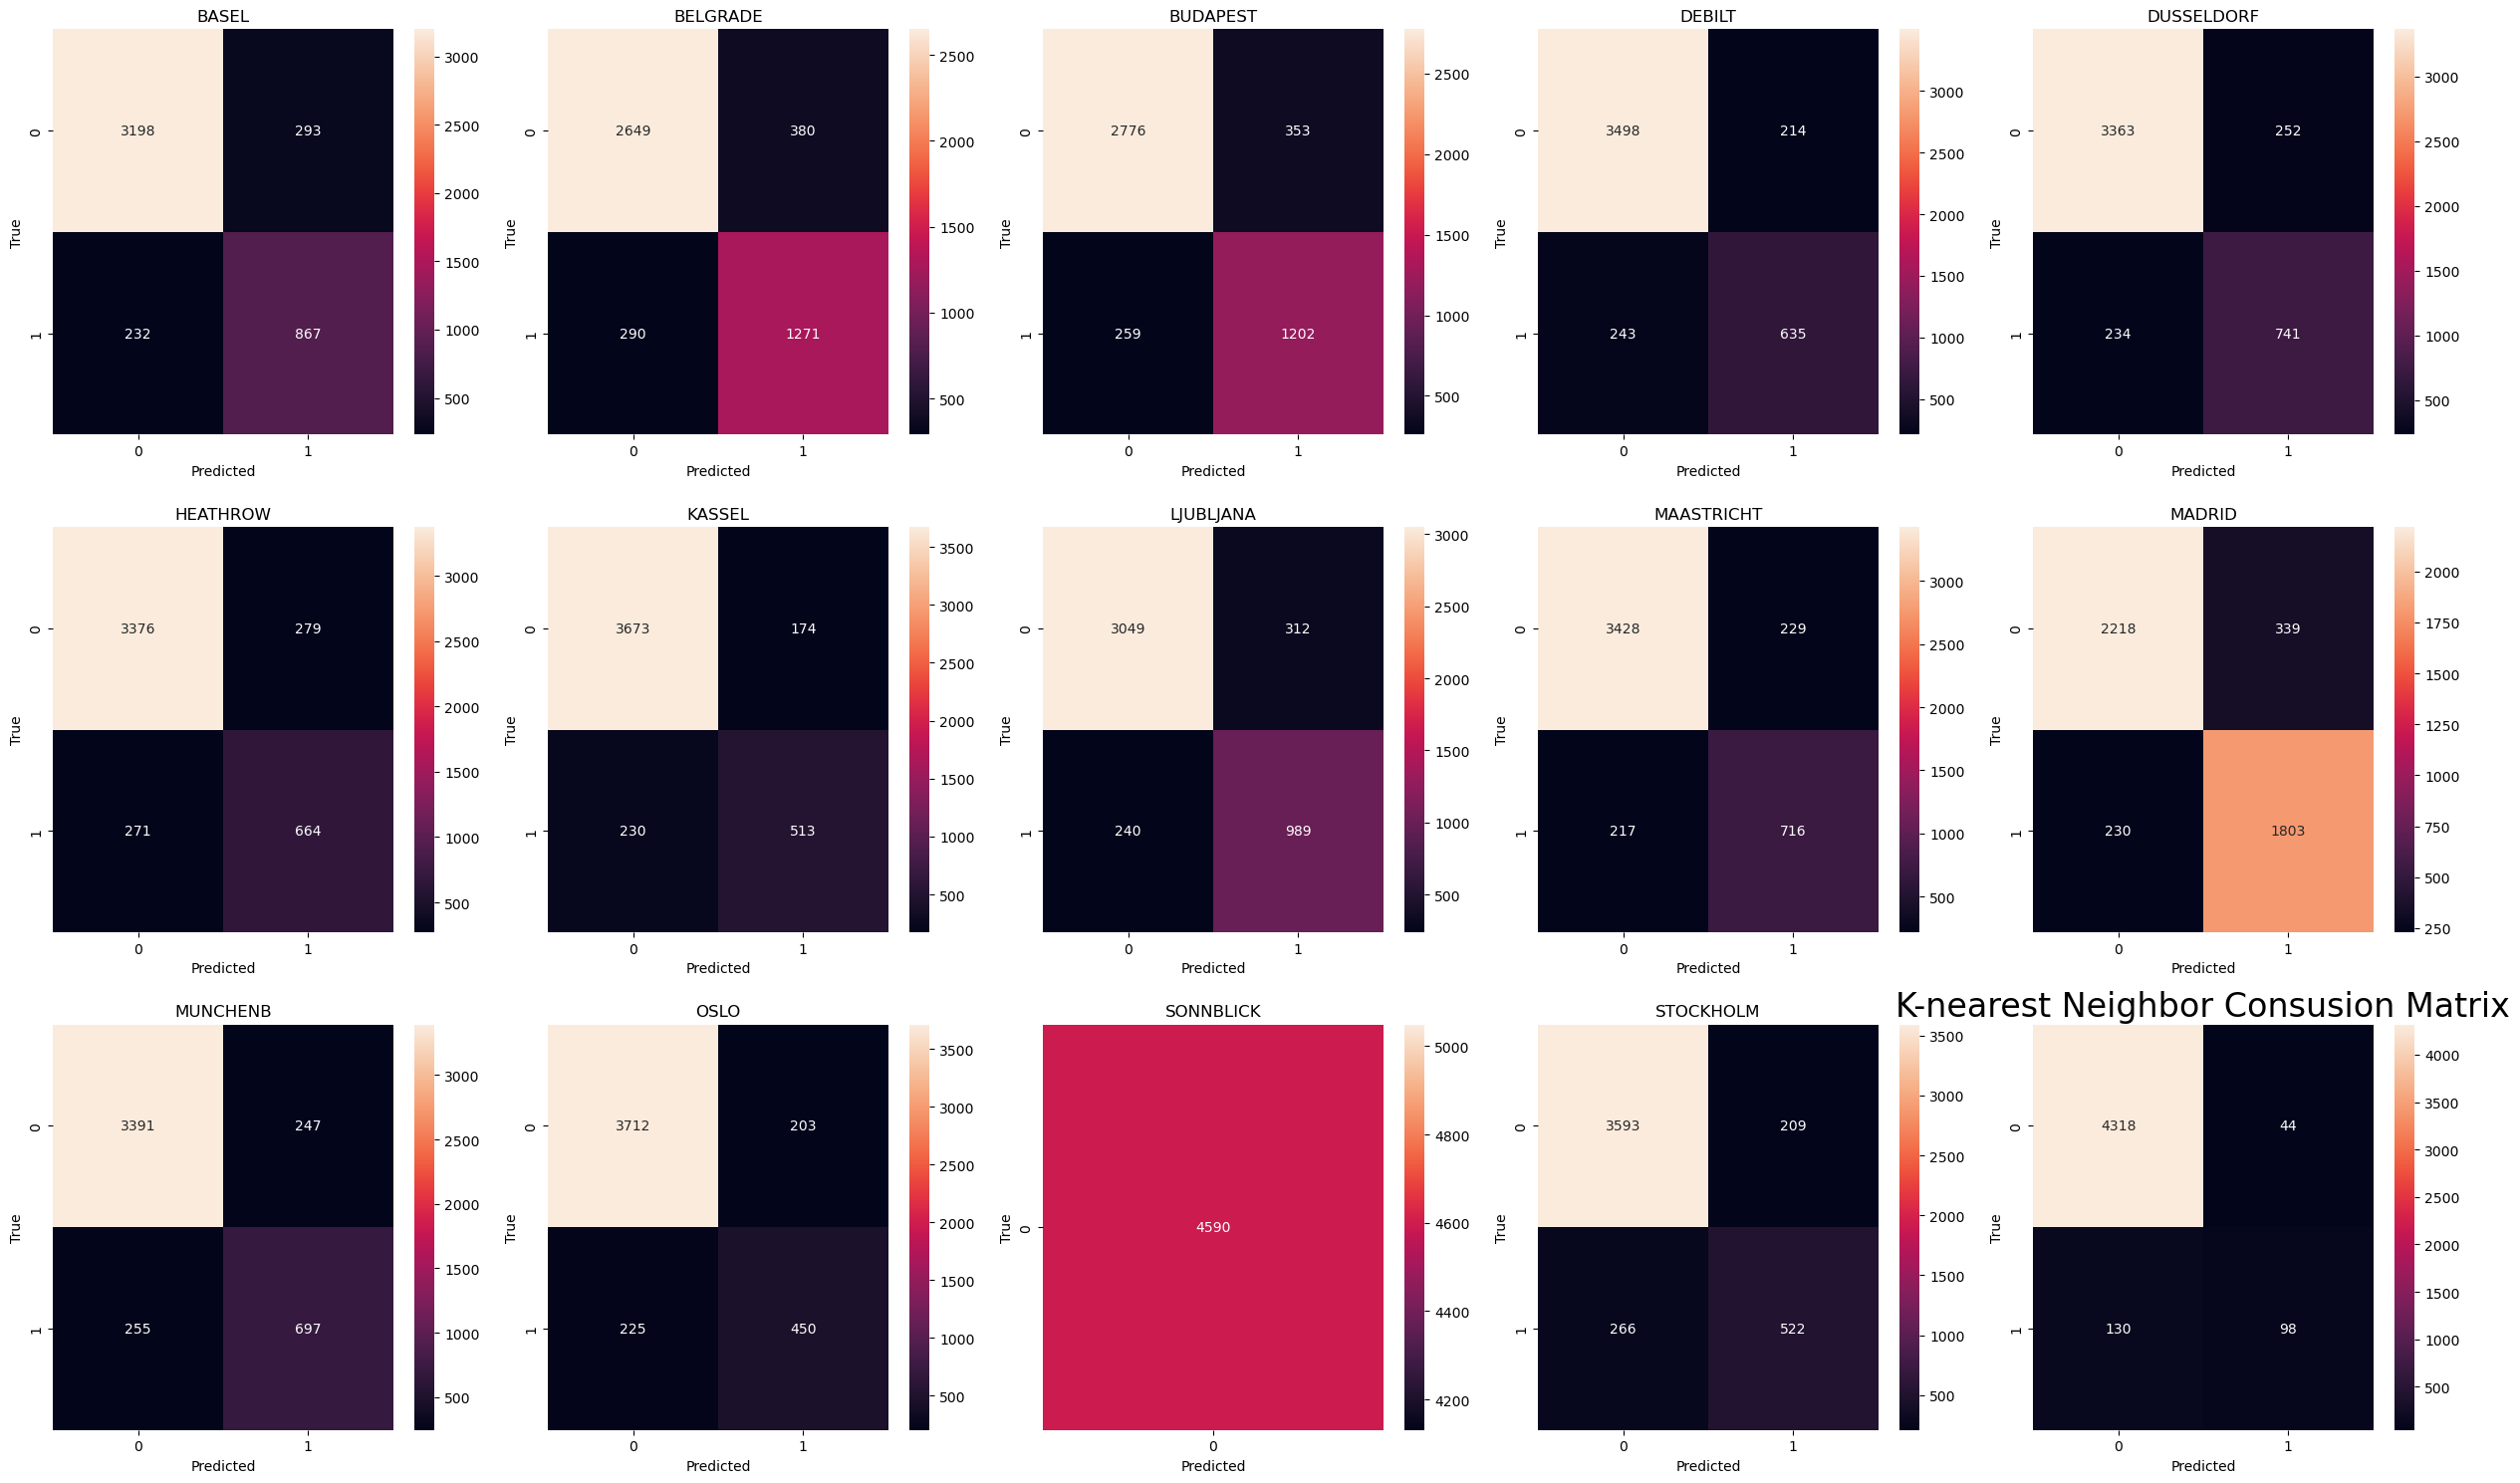

In [14]:
locations = stations
key = "_pleasant_weather"

fig, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0

for i in range(3):
    for j in range(5):
        name = locations[count]

        cm = confusion_matrix(y_test[name + key], y_pred[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_title(name)
        ax[i, j].set_xlabel("Predicted")
        ax[i, j].set_ylabel("True")

        count += 1
plt.title('K-nearest Neighbor Consusion Matrix', fontsize=24)
plt.tight_layout()
plt.show()


In [ ]:
y_pred_test = climate_dt.predict(X_test)

print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

print('Test accuracy score: ',cross_val_score(climate_dt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6022537119955728
Test accuracy score:  0.5515894150060404


In [17]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
clf = MultiOutputClassifier(knn, n_jobs=-1)

clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Train / test accuracy
print("Train accuracy score:", clf.score(X_train, y_train))
print("Test accuracy score:", clf.score(X_test, y_test))


Train accuracy score: 0.5705882352941176
Test accuracy score: 0.45773420479302834


In [16]:
pleasant["SONNBLICK_pleasant_weather"].value_counts()


SONNBLICK_pleasant_weather
0    22950
Name: count, dtype: int64

In [ ]:
stations = [col.replace("_pleasant_weather", "") for col in y_test.columns]

results = []

for idx, station in enumerate(stations):
    true_vals = y_test.iloc[:, idx].values
    pred_vals = y_pred[:, idx]

    # Confusion matrix components
    TP = np.sum((true_vals == 1) & (pred_vals == 1))
    TN = np.sum((true_vals == 0) & (pred_vals == 0))
    FP = np.sum((true_vals == 0) & (pred_vals == 1))
    FN = np.sum((true_vals == 1) & (pred_vals == 0))

    accurate = TP+TN
    total = len(true_vals)
    accuracy_rate = accurate / total

    results.append({
        "Weather Station": station,
        "True positive": TP,
        "True negaitive": TN,
        "False positive": FP,
        "False negative": FN,
        "Accuracy rate": f"{accuracy_rate:.0%}"
    })

df_results = pd.DataFrame(results)

# Pretty printing
print(df_results.to_string(index=False))

Weather Station  True positive  True negaitive  False positive  False negative Accuracy rate
          BASEL            867            3198             293             232           89%
       BELGRADE           1271            2649             380             290           85%
       BUDAPEST           1202            2776             353             259           87%
         DEBILT            635            3498             214             243           90%
     DUSSELDORF            741            3363             252             234           89%
       HEATHROW            664            3376             279             271           88%
         KASSEL            513            3673             174             230           91%
      LJUBLJANA            989            3049             312             240           88%
     MAASTRICHT            716            3428             229             217           90%
         MADRID           1803            2218             339        